<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

**Технологический процесс:**
    
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов:**
    
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

## Подготовка данных

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

RANDOM_STATE = 12345

METALS = ['au', 'ag', 'pb']

CONCENTRATE_METRICS = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate',
]

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [ ]:

df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
df_test 

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [ ]:
def show_rows(data_frame):
    rows_count, columns_count = data_frame.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].value_counts(sort=False))
    print('Количество пропусков в каждом столбце')    
    print(data_frame.isna().sum())

In [ ]:
show_rows(df_train)

Количество стобцов: 87
Количество строк: 14149
Уникальные значения столбца date
2017-02-09 03:59:59    1
2017-06-18 07:59:59    1
2018-01-01 18:59:59    1
2018-08-10 18:59:59    1
2017-01-21 07:59:59    1
                      ..
2018-03-24 04:59:59    1
2016-05-23 08:59:59    1
2016-07-29 23:59:59    1
2016-04-10 02:00:00    1
2017-08-27 20:59:59    1
Name: date, Length: 14149, dtype: int64
Уникальные значения столбца final.output.concentrate_ag
0.000000    58
4.719990     1
3.666412     1
7.638199     1
4.088407     1
            ..
4.195470     1
3.480709     1
5.231190     1
3.908685     1
6.808452     1
Name: final.output.concentrate_ag, Length: 14064, dtype: int64
Уникальные значения столбца final.output.concentrate_pb
0.000000     58
10.188608     1
8.298796      1
11.545038     1
8.250501      1
             ..
9.797805      1
11.730163     1
11.397350     1
10.648009     1
9.521703      1
Name: final.output.concentrate_pb, Length: 14050, dtype: int64
Уникальные значения столбц

In [ ]:
show_rows(df_test)

Количество стобцов: 53
Количество строк: 5290
Уникальные значения столбца date
2016-12-01 13:59:59    1
2016-10-17 17:59:59    1
2016-12-15 00:59:59    1
2016-10-07 12:59:59    1
2016-11-17 00:59:59    1
                      ..
2017-12-02 08:59:59    1
2017-12-03 12:59:59    1
2016-12-23 11:59:59    1
2016-10-03 22:59:59    1
2016-10-18 03:59:59    1
Name: date, Length: 5290, dtype: int64
Уникальные значения столбца primary_cleaner.input.sulfate
193.813199    1
181.531902    1
166.568879    1
194.029979    1
128.839908    1
             ..
214.196920    1
229.828402    1
104.842825    1
181.568784    1
185.407802    1
Name: primary_cleaner.input.sulfate, Length: 5286, dtype: int64
Уникальные значения столбца primary_cleaner.input.depressant
7.477953     1
10.027764    1
11.972179    1
9.973052     1
8.031681     1
            ..
5.974155     1
3.979725     1
11.000983    1
11.964658    1
7.056575     1
Name: primary_cleaner.input.depressant, Length: 5285, dtype: int64
Уникальные значе

In [ ]:
show_rows(df_full)

Количество стобцов: 87
Количество строк: 19439
Уникальные значения столбца date
2017-02-09 03:59:59    1
2016-12-15 00:59:59    1
2017-06-18 07:59:59    1
2017-10-16 06:59:59    1
2018-01-01 18:59:59    1
                      ..
2016-05-23 08:59:59    1
2016-12-23 11:59:59    1
2016-07-29 23:59:59    1
2016-10-03 22:59:59    1
2017-08-27 20:59:59    1
Name: date, Length: 19439, dtype: int64
Уникальные значения столбца final.output.concentrate_ag
0.000000    98
5.512268     1
4.630376     1
3.666412     1
4.084050     1
            ..
5.231190     1
4.303549     1
4.796946     1
6.808452     1
4.334761     1
Name: final.output.concentrate_ag, Length: 19307, dtype: int64
Уникальные значения столбца final.output.concentrate_pb
0.000000     98
8.440547      1
10.188608     1
11.060670     1
11.545038     1
             ..
9.898792      1
11.730163     1
11.397350     1
10.648009     1
9.521703      1
Name: final.output.concentrate_pb, Length: 19276, dtype: int64
Уникальные значения столбц

<div class="alert alert-info">
<h2> 👆 О таблицах :<a class="tocSkip"> </h2>
<br> * В данных есть пропуски
<br> * В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей выборке.

    
</div>

# Проверка правильности вычисленной эффективности обогащения

Напишем функцию для расчета Recovery по формуле

In [ ]:
def calculate_recovery(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) / (rougher_input * (rougher_output - rougher_tail)) * 100
    
   
    return recovery

In [ ]:
recovery = calculate_recovery(
    df_train['rougher.output.concentrate_au'], 
    df_train['rougher.input.feed_au'], 
    df_train['rougher.output.tail_au'],
)
print(recovery.describe())

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64


In [ ]:
mae_recovery = mean_absolute_error(df_train['rougher.output.recovery'].dropna(), recovery.dropna())
print('MAE =', mae_recovery)

MAE = 9.73512347450521e-15


<div class="alert alert-info">
<h2> Вывод :<a class="tocSkip"> </h2>
<br> * MAE (средняя абсолютная ошибка) между рассчитаной по формуле эффективностью обогащения и признаком из датасета очень мала, а значит значение эффективности в датасете верное.
    
</div>

# Анализ признаков, недоступных в тестовой выборке

In [ ]:


list(set(df_train).difference(df_test.columns))


['rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.tail_sol',
 'final.output.concentrate_au',
 'rougher.output.tail_au',
 'final.output.tail_ag',
 'final.output.concentrate_sol',
 'final.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_ag',
 'rougher.output.recovery',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.tail_sol',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_ag',
 'final

<div class="alert alert-info">
<h2> Вывод :<a class="tocSkip"> </h2>
    
<br> * Все признаки имеют тип `float`
    <br> * Признаки `output` - целевые признаки и поэтому отсутствуют в тестовой выборке
    <br> * Признаки `rougher.calculation` - это расчетные характеристики и отсутвуют они скорее всего из-за того, что они расчитываются после завершения процесса.

    
</div>

# Предобработка данных

Проведем чистку от пропущенных значений в обучающей и тестовой выборке.В условии написано, что соседние по времени параметры часто похожи, поэтому заполним пропуски, используя сосдение значения

In [ ]:
good_df_train = df_train.fillna(method='ffill')
good_df_train.isna().mean()

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

In [ ]:
good_df_test = df_test.fillna(method='ffill')
good_df_test.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


In [ ]:
good_df_full = df_full.fillna(method='ffill')
good_df_full.isna().mean()

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

In [ ]:
good_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [ ]:
good_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
good_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


<div class="alert alert-info">
<h2> Комментарий :<a class="tocSkip"> </h2>
    
<br> В данных присутвовали аномалии:

<br>Пропущенные значение

<br>Данные пропущенные значения были заменены на соседние,так как соседние по времени параметры часто похожи.

    
</div>




В качестве подготовки данных необходимо добавить целевые признаки в тестовую выборку из полного датасета (rougher.output.recovery и final.output.recovery), а так же удалить лишние столбцы из обучающей выборки.

In [ ]:
good_df_test = good_df_test.merge(good_df_full[['date','rougher.output.recovery','final.output.recovery']], on = 'date', how = 'left')

In [ ]:
good_df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [ ]:
good_df_train = good_df_train[good_df_test.columns]
good_df_train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


**Комментарий**

В результате работы по первому разделу работы, мы получили готовую к машинному обучению тестовую и обучающую выборки.

## Анализ данных

# Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [ ]:
concentration = pd.DataFrame([
    [
        good_df_full['rougher.output.concentrate_au'].mean(),
        good_df_full['rougher.output.concentrate_ag'].mean(),
        good_df_full['rougher.output.concentrate_pb'].mean(),
    ],                             
    [
        good_df_full['primary_cleaner.output.concentrate_au'].mean(),
        good_df_full['primary_cleaner.output.concentrate_ag'].mean(),
        good_df_full['primary_cleaner.output.concentrate_pb'].mean(),
        
    ],                             
    [
        good_df_full['final.output.concentrate_au'].mean(),
        good_df_full['final.output.concentrate_ag'].mean(),
        good_df_full['final.output.concentrate_pb'].mean(),
    ]
],
    columns=['Au','Ag','Pb'], 
    index = ['rougher','primary_cleaner','final'])

concentration

,Au,Ag,Pb
rougher,19.772000,11.994759,7.606272
primary_cleaner,32.119400,8.442408,9.810317
final,44.076513,5.168387,9.978821


**Выводы:**

 - Концентрация Au (золота) растет на протяжеии всех этапов и в конце становится больше, чем в начале
 - Концентрация Ag (серебра) падает начиная с этапа флотации
 - Концентрация Pb (свинца) медленно растет на протяжении всех этапов очистки
 
 Проиллюстрируем это на графике 

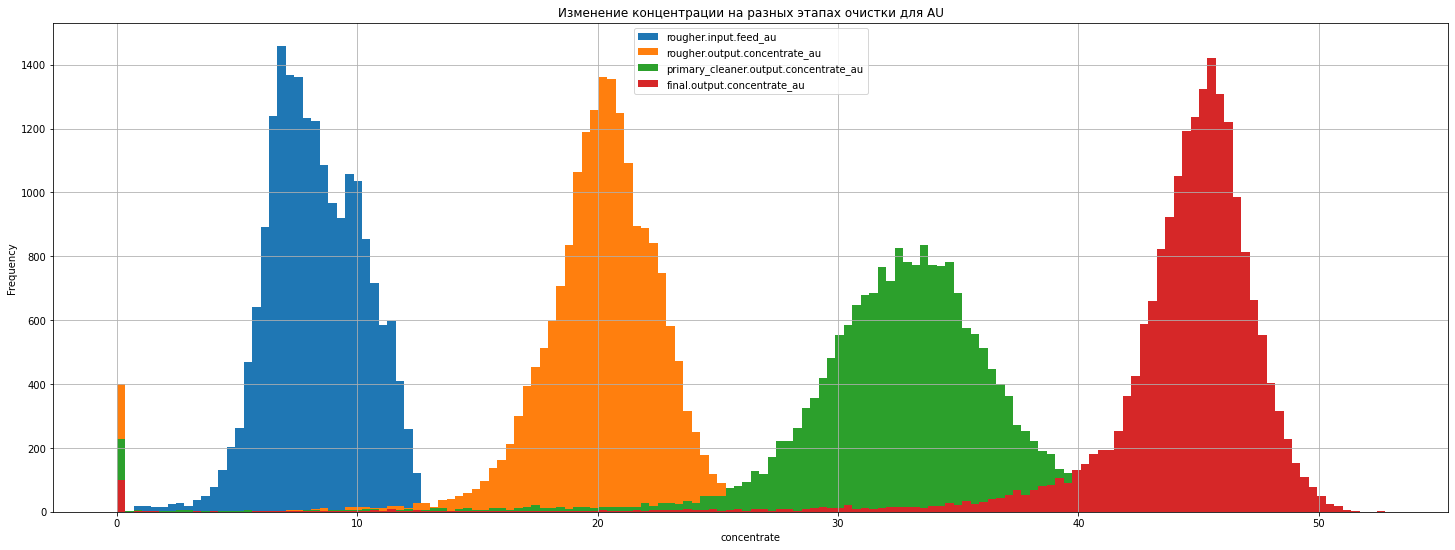

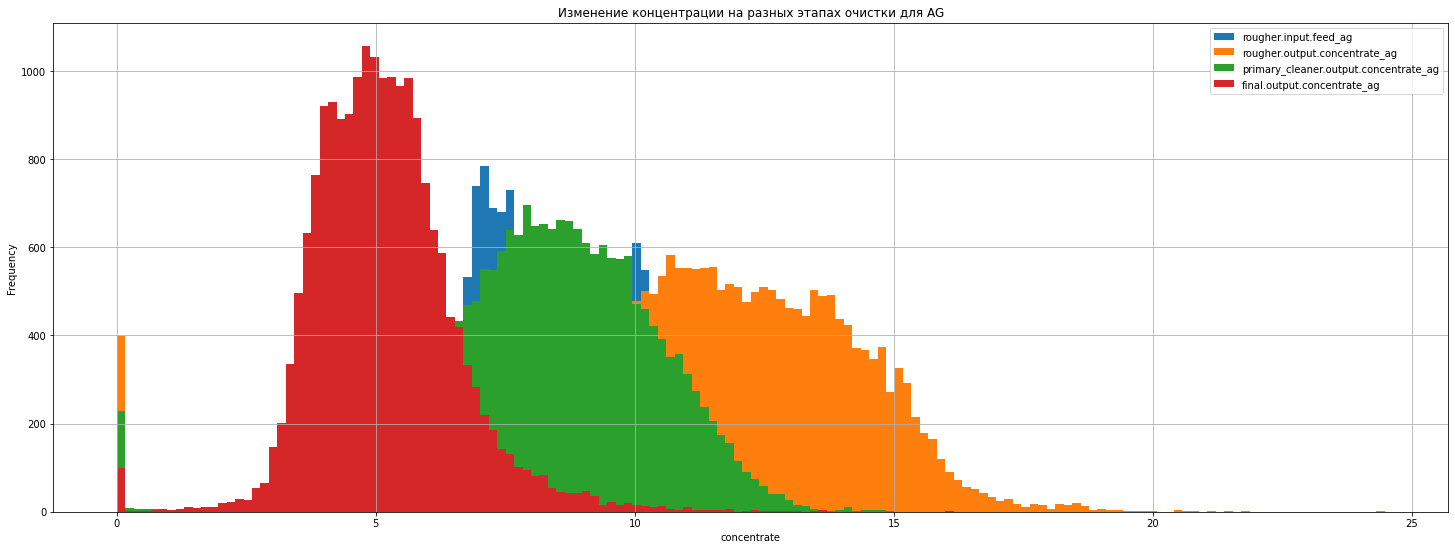

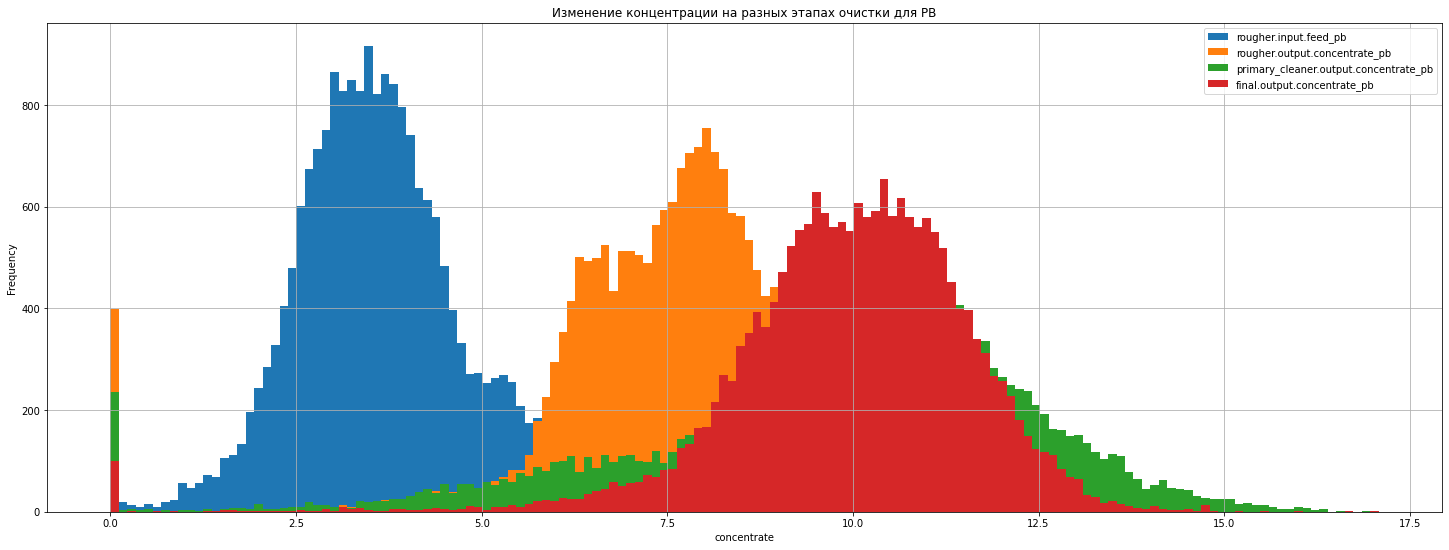

In [ ]:
for i in METALS:
    metrics = ['{}_{}'.format(x, i) for x in CONCENTRATE_METRICS]
    
    good_df_full[metrics].plot(
        title = 'Изменение концентрации на разных этапах очистки для {}'.format(i.upper()),
        kind='hist', 
        bins=150, 
        grid=True, 
        legend=True,
        figsize=(25, 9),
        alpha=1,
    ).set(xlabel='concentrate') 
    
    plt.show()
    

# Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

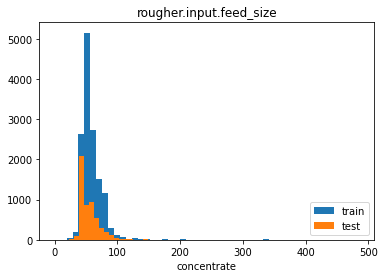

In [ ]:

y1 = good_df_train['rougher.input.feed_size']
  

y2 = good_df_test['rougher.input.feed_size']
  
  
plt.hist(y1,50)
plt.hist(y2,50)
  
 
plt.legend(["train", "test"], loc ="lower right")
plt.title ('rougher.input.feed_size')
plt.xlabel('concentrate')

plt.show()

**Выводы:**

 У обучающей и тестовой выборки разные средние значения, но вид распределения размеров гранул сырья совпадают,а значит оценка модели будет правильной.

# Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

No handles with labels found to put in legend.


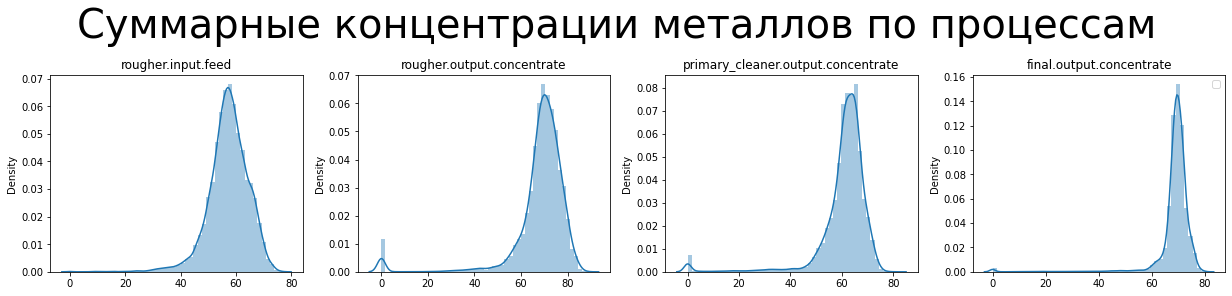

In [ ]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']
fig, axs = plt.subplots(1, len(process), figsize=(17, 4), constrained_layout=True)
fig.suptitle('Суммарные концентрации металлов по процессам', fontsize=40)
for stage, ax in zip(process, axs):
    ax.set_title(stage)
    sum_good_df_full = good_df_full[stage+ '_ag'] + good_df_full[stage+ '_au'] + good_df_full[stage+ '_pb']+good_df_full[stage+ '_sol']
    sns.distplot(sum_good_df_full, ax=ax) 

   
    

plt.legend()
plt.show()

**Выводы**
 - Очевидно, что с каждым следующим этапом очистки суммарная концентрация веществ растет. Однако, видны аномалии на отметке 0. Эти значения стоит удалить, т.к. вещество не может весить 0 граммов, и это, вероятнее всего, ошибка измерений.

In [ ]:
good_df_full = good_df_full[
    (
        (good_df_full['rougher.output.concentrate_ag'] + 
         good_df_full['rougher.output.concentrate_pb'] + 
         good_df_full['rougher.output.concentrate_sol'] + 
         good_df_full['rougher.output.concentrate_au'])>0
    ) & (
        (good_df_full['final.output.concentrate_ag'] + 
         good_df_full['final.output.concentrate_pb'] + 
         good_df_full['final.output.concentrate_sol'] + 
         good_df_full['final.output.concentrate_au'])>0
    ) & (
        (good_df_full['rougher.input.feed_ag'] + 
         good_df_full['rougher.input.feed_pb'] + 
         good_df_full['rougher.input.feed_sol'] + 
         good_df_full['rougher.input.feed_au'])>0
    ) & (
        (good_df_full['primary_cleaner.output.concentrate_ag'] + 
         good_df_full['primary_cleaner.output.concentrate_pb'] + 
         good_df_full['primary_cleaner.output.concentrate_sol'] + 
         good_df_full['primary_cleaner.output.concentrate_au'])>0
    ) 
]

In [ ]:
print(good_df_train.shape)
good_df_train = good_df_train[good_df_train['date'].isin(good_df_full['date'])]
good_df_test = good_df_test[good_df_test['date'].isin(good_df_full['date'])]
#good_df_train[good_df_train['primary_cleaner.output.concentrate_au'] == 0].head()
print(good_df_train.shape)
print(good_df_test.shape)

(14149, 55)
(13725, 55)
(5123, 55)


## Модель

# Функция для вычисления итоговой sMAPE

Напишем функции для вычисления sMAPE и итоговой sMAPE

In [ ]:
def  smape(target,prediction):
    n  = len(target)
    return (((np.abs((target-prediction))/((np.abs(target)+np.abs(prediction))/2)).sum()) * 100 / n)
        
  
        
  
            
    

In [ ]:
def end_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape

In [ ]:
smape_scorer = make_scorer(smape, greater_is_better=False) 

In [ ]:
features_train = good_df_train.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_train_1 = good_df_train['rougher.output.recovery']
target_train_2 = good_df_train['final.output.recovery']


features_test = good_df_test.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_test_1 = good_df_test['rougher.output.recovery']
target_test_2 = good_df_test['final.output.recovery']

Так как нужно предсказать численное значение, следовательно перед нами задача регрессии. Поэтому применяем модели связанные с регрессией

 - Линейная регрессия
- DecisionTreeRegressor
 - RandomForestRegressor

In [ ]:
param_grid = {'max_depth': range(2, 11)}
             

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train_1)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 7.313442159829718 при значениях гиперпараметров: {'max_depth': 4}


In [ ]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train_2)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 9.440354196471514 при значениях гиперпараметров: {'max_depth': 3}


In [ ]:
model = LinearRegression()
model.fit(features_train, target_train_1)
smapes = cross_val_score(model, features_train, target_train_1, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smapes)

Лучшее значение sMAPE для линейной регрессии: 7.2656960475660055


In [ ]:
model = LinearRegression()
model.fit(features_train, target_train_2)
smapes = cross_val_score(model, features_train, target_train_2, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smapes)

Лучшее значение sMAPE для линейной регрессии: 10.950532500993102


In [ ]:
param_grid = {'n_estimators': range(10, 31, 10),'max_depth': range(2, 11)}

model = RandomForestRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train_1)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 6.688645193822163 при значениях гиперпараметров: {'max_depth': 3, 'n_estimators': 10}


In [ ]:
param_grid = {'n_estimators': range(10, 31, 10),'max_depth': range(2, 11)}

model = RandomForestRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train_2)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 9.029458341035504 при значениях гиперпараметров: {'max_depth': 4, 'n_estimators': 30}


In [ ]:
model = RandomForestRegressor(max_depth=3, n_estimators=10, random_state=RANDOM_STATE)
model_rougher=model.fit(features_train, target_train_1)
predictions_rougher =model_rougher.predict(features_test)

In [ ]:
model = RandomForestRegressor(max_depth=3, n_estimators=10, random_state=RANDOM_STATE)
model_final = model.fit(features_train, target_train_2)

predictions_final = model_final.predict(features_test)

result = end_smape(smape(target_test_1,predictions_rougher),smape(target_test_2,predictions_final))
print(result)


7.15887454454165


# Инициализируем и обучим константную модель

In [ ]:
model_dr = DummyRegressor(strategy="median")
model_rougher_dr=model_dr.fit(features_train, target_train_1)
model_final_dr = model_dr.fit(features_train, target_train_2)

predictions_rougher_dr =model_rougher_dr.predict(features_test)
predictions_final_dr = model_final_dr.predict(features_test)

results = end_smape(smape(target_test_1,predictions_rougher_dr),smape(target_test_2,predictions_final_dr))

print(results)

12.43952350124749


В ходе работы над проектом были выполнены все поставленные задачи. А именно:

мы обработали данные, убрали из обучающей выборки лишние колонки, добавили в тестовую выборку таргеты, заполнили пропуски в датасетах;
отчистили данные от вбросов;
анализ графиков наглядно показал концентрацию полезных веществ на разных этапах очистки;
было принято решение избавиться от нулевых значений суммарных концентраций веществ;


**Вывод после сравнения результатов**
случайный лес дал лучшее значение итогового sMAPE среди других моделей- 7.15887454454165
Ошибка на тесте приемлемая, так как она меньше чем на константном алгоритме





## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке